In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('SMSSpamCollection',sep='\t',names=['label', 'message'])

# '\t' will actually help to divide the dataset in two columns
# label and message are the names of the columns

In [3]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.columns

#The names of the columns

Index(['label', 'message'], dtype='object')

In [6]:
df.shape

#The dataset contains 2 columns and 5572 rows

(5572, 2)

In [7]:
df.head(10)

#The 10 top rows of the dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [8]:
df.tail(10)

#The bottom 10 rows of the dataset

,label,message
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
df.describe()

#The description of the entire Dataset
#ham occurs most of the time (4825)

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df['label'].value_counts()

#The number of ham and spam in the label column of the dataset

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

#import matplotlib library for plotting various features

<IPython.core.display.Javascript object>

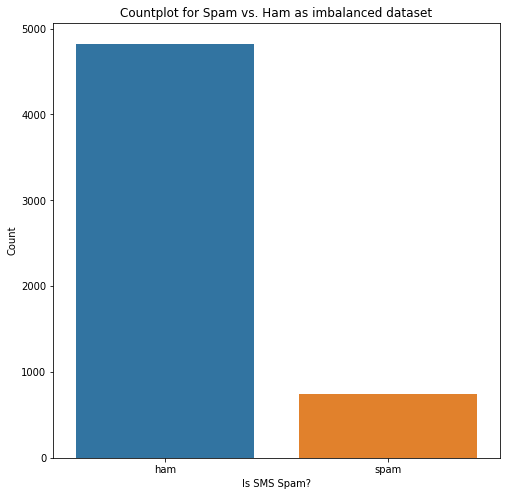

In [12]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as imbalanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

#Plotting the frequency of ham and spam

In [13]:
import re
import nltk

#importing the regular expression(re) & Natural Language Toolkit (nltk) libraries

In [14]:
from nltk.corpus import stopwords

#importing stopwords to prevent the common words in english

In [15]:
from nltk.stem.porter import PorterStemmer

#importing porter stemmer to stem the words in the dataset

In [16]:
ps = PorterStemmer()

In [17]:
corpus = []

for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['message'][i])    #review will only have elements in (a-z) or (A-Z)
    review = review.lower()                              #all the text will be lowered
    review = review.split()                              #the sentences will be splitted into words
    review = [ps.stem(word)  for word in review if word not in set(stopwords.words('english'))]       #applying stop words
    review = ' '.join(review)                            #joining the words after getting filtered through stopwords
    corpus.append(review)                                #adding the words into the corpus list

In [18]:
corpus[0:3]

#we can see that the words have been stemmed 
#for ex. crazy ~ crazi & available ~ avail

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli']

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

#importing count vectorizer to convert each and every word into 1 or 0

In [20]:
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()

#using count vectorizer to put the transformed words into array form

In [21]:
y = pd.get_dummies(df['label'])
y

#we use get dummies fucntion to get the dummies for the ham and spam label, because model only understands numbers and not words
# If a message is ham , it got labelled as 1, and if it is a spam, it got labelled as 0

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [23]:
X.shape

# X has 2500 columns now because we used max_features to get the max features in term frequency
# Top 2500 more frequent words have been selected

(5572, 2500)

In [24]:
y



,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [28]:
y

#dropped the ham column by using y.drop(['ham'], axis = 'columns') in the next cell
# 
#If spam is 1, its spam; if spam is 0, its ham
#
#A message can be interpreted as a ham or spam by only the spam column, so we dont need the ham column

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [26]:
y = y.drop('ham', axis = 'columns')


In [30]:
X

#If a particular sentence has a particular word, the column will show 1, else 0

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
from sklearn.model_selection import train_test_split\

#importing train_test_split to split the dataset into training and testing set

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

#splitting the dataset, test set has 20% of the values
#train set has 80% of the values

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
spamdetectmodel = MultinomialNB().fit(x_train, y_train)

#We import multinomial naive bayes from sklearn and the train the data

C:\Users\Sumiron\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [35]:
y_pred = spamdetectmodel.predict(x_test)

#predicting the data from the test set

In [36]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [37]:
y_prediction = pd.DataFrame(y_pred)

#putting the prediction in a dataframe

In [38]:
y_prediction

,0
0,0
1,1
2,0
3,0
4,0
...,...
1110,0
1111,0
1112,0
1113,1


In [39]:
y_prediction.rename(columns={0:'spam'})

#renaming the 0 column to "spam"

,spam
0,0
1,1
2,0
3,0
4,0
...,...
1110,0
1111,0
1112,0
1113,1


In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
cm = confusion_matrix(y_test, y_prediction)

#we import confusion matrix to see how many values have been predicted correctly

In [42]:
cm

array([[946,   9],
       [  7, 153]], dtype=int64)

In [43]:
# We see the 946 + 153 values are correctly predicted 

In [44]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_prediction)

#we import accuracy score to check the accuracy of the model

In [45]:
acc

0.9856502242152466

In [41]:
# so the accuracy is 98.5 %

## PREDICITIONS

In [46]:
def predict_spam(sample_message):
  sample_message = re.sub('[^a-zA-Z]',' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [ps.stem(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = cv.transform([final_message]).toarray()
  return spamdetectmodel.predict(temp)


#we write a predict spam function to further predict any new message as ham or spam

In [47]:
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a normal or HAM message.')



# This is our first prediction

This is a SPAM message.


In [48]:
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a normal or HAM message.')


#this is our second prediction


This is a normal or HAM message.


In [49]:
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a normal or HAM message.')


#this is our third prediction

This is a normal or HAM message.


In [50]:
sample_message = 'lottery winner $1000'

if predict_spam(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a normal or HAM message.')

#this is our fourth prediction

This is a SPAM message.


In [51]:
sample_message = 'You need to pickup the medicines for mother from the medical store'

if predict_spam(sample_message):
  print('This is a SPAM message.')
else:
  print('This is a normal or HAM message.')

#this is our fifth prediction

This is a normal or HAM message.
